In [ ]:
import pandas

In [ ]:
weather = pandas.read_excel('/content/weather_moscow.xls', skiprows=6)

In [ ]:
weather["T"].describe()

count    17647.000000
mean         6.898102
std         10.204094
min        -29.900000
25%         -0.400000
50%          5.800000
75%         15.200000
max         33.400000
Name: T, dtype: float64

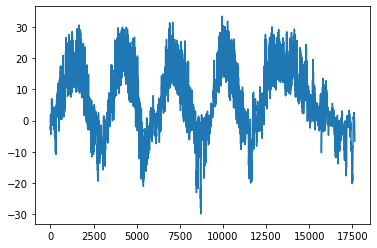

In [ ]:
weather["T"].plot()

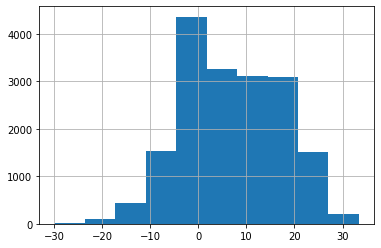

In [ ]:
weather["T"].hist()

In [ ]:
weather["DD"].value_counts()

Штиль, безветрие                          4034
Ветер, дующий с юго-юго-востока           1701
Ветер, дующий с запада                    1433
Ветер, дующий с севера                    1389
Ветер, дующий с юга                       1188
Ветер, дующий с северо-северо-запада      1104
Ветер, дующий с северо-запада             1089
Ветер, дующий с западо-юго-запада         1051
Ветер, дующий с западо-северо-запада       839
Ветер, дующий с юго-востока                669
Ветер, дующий с северо-северо-востока      582
Ветер, дующий с юго-юго-запада             519
Ветер, дующий с юго-запада                 500
Ветер, дующий с востока                    492
Ветер, дующий с востоко-юго-востока        374
Ветер, дующий с северо-востока             352
Ветер, дующий с востоко-северо-востока     331
Name: DD, dtype: int64

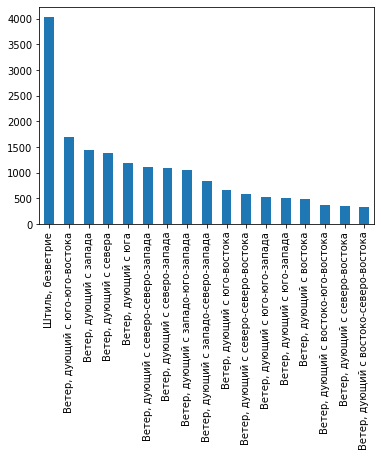

In [ ]:
weather["DD"].value_counts().plot(kind="bar")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
weather["DD"].value_counts().index

Index(['Штиль, безветрие', 'Ветер, дующий с юго-юго-востока',
       'Ветер, дующий с запада', 'Ветер, дующий с севера',
       'Ветер, дующий с юга', 'Ветер, дующий с северо-северо-запада',
       'Ветер, дующий с северо-запада', 'Ветер, дующий с западо-юго-запада',
       'Ветер, дующий с западо-северо-запада', 'Ветер, дующий с юго-востока',
       'Ветер, дующий с северо-северо-востока',
       'Ветер, дующий с юго-юго-запада', 'Ветер, дующий с юго-запада',
       'Ветер, дующий с востока', 'Ветер, дующий с востоко-юго-востока',
       'Ветер, дующий с северо-востока',
       'Ветер, дующий с востоко-северо-востока'],
      dtype='object')

In [ ]:
weather["DD"].value_counts()

Штиль, безветрие                          4034
Ветер, дующий с юго-юго-востока           1701
Ветер, дующий с запада                    1433
Ветер, дующий с севера                    1389
Ветер, дующий с юга                       1188
Ветер, дующий с северо-северо-запада      1104
Ветер, дующий с северо-запада             1089
Ветер, дующий с западо-юго-запада         1051
Ветер, дующий с западо-северо-запада       839
Ветер, дующий с юго-востока                669
Ветер, дующий с северо-северо-востока      582
Ветер, дующий с юго-юго-запада             519
Ветер, дующий с юго-запада                 500
Ветер, дующий с востока                    492
Ветер, дующий с востоко-юго-востока        374
Ветер, дующий с северо-востока             352
Ветер, дующий с востоко-северо-востока     331
Name: DD, dtype: int64

In [ ]:
import numpy as np
np.arange(19)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

Text(0.5, 1.0, 'Частота разных ветров')

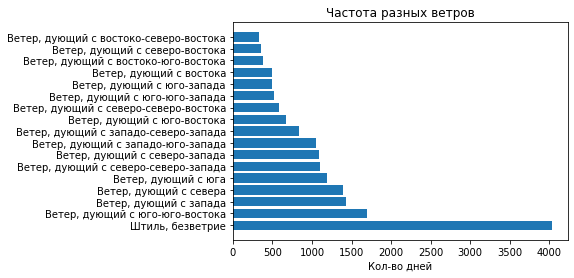

In [ ]:
fig, ax = plt.subplots()

y_pos=np.arange(len(weather["DD"].value_counts().index))
ax.barh(y_pos, weather["DD"].value_counts())
ax.set_yticks(y_pos)
ax.set_yticklabels(weather["DD"].value_counts().index)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Кол-во дней')
ax.set_title('Частота разных ветров')

In [ ]:
x = pandas.to_datetime(weather['Местное время в Москве (ВДНХ)'], dayfirst=True)
y = weather['T']

In [ ]:
weather['date'] = pandas.to_datetime(weather['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [ ]:
start = pandas.Timestamp(year=2018, day=1, month=1)
end = pandas.Timestamp(year=2018, day=31, month=12)
filter = (weather['date'] > start) & (weather['date'] < end)
weather[filter]['T'].describe()

count    2911.000000
mean        6.687427
std        11.597268
min       -21.100000
25%        -3.300000
50%         7.100000
75%        16.750000
max        29.900000
Name: T, dtype: float64

In [ ]:
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather['weekday'] = weather['date'].dt.weekday

In [ ]:
weather.groupby(['weekday'])['T'].mean()

weekday
0    6.866773
1    6.709131
2    6.903505
3    6.744616
4    6.801697
5    7.141882
6    7.120127
Name: T, dtype: float64

In [ ]:
weather[(weather['year'] == 2019) & (weather['weekday'] == 4)]['T'].min()

-16.1

In [ ]:
weather[(weather['year'] == 2019) & (weather['weekday'] == 4) & (weather['T'] == -16.1)]

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,year,month,weekday
2731,25.01.2019 09:00,-16.1,754.6,770.6,1.6,88.0,"Штиль, безветрие",0,NaN,NaN,Облаков нет.,,NaN,NaN,-16.8,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-17.6,0.2,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,31,2019-01-25 09:00:00,2019,1,4


In [ ]:
weather.to_excel("data_processed.xls")

In [ ]:
weather.groupby(['weekday']).mean()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,year,month
weekday,,,,,,,,,,,,,,,,
0,6.866773,746.866945,761.359538,0.084140,72.912525,1.235411,11.125000,11.411111,3.878927,10.467816,8.414947,1.579602,12.000000,9.533784,2016.660977,6.037316
1,6.709131,747.506484,762.023866,0.098355,72.125050,1.226677,11.294118,11.638298,3.645681,10.426538,8.504261,1.251806,12.000000,9.406667,2016.663755,6.025010
2,6.903505,747.930028,762.449144,-0.013462,71.142971,1.158104,10.727273,11.359223,3.562069,10.437692,8.729505,1.155078,12.000000,9.107383,2016.672640,6.039427
3,6.744616,747.757878,762.276207,0.004023,73.252377,1.178939,11.250000,11.494505,3.597889,10.180309,8.373209,1.510460,12.011561,9.779310,2016.646477,6.033254
4,6.801697,747.678769,762.193923,-0.082237,73.524862,1.116022,10.428571,11.493506,3.576245,10.322519,8.166214,1.639503,12.000000,9.604167,2016.643252,6.017364
5,7.141882,746.993966,761.474672,-0.044302,74.366455,1.174672,10.727273,11.012658,3.968642,10.670498,8.205000,2.115779,12.000000,9.843537,2016.654228,6.037713
6,7.120127,746.604014,761.077107,-0.041663,73.971338,1.218341,10.736842,11.567010,3.872797,10.613027,8.214337,2.013256,12.000000,9.675862,2016.657801,6.046447


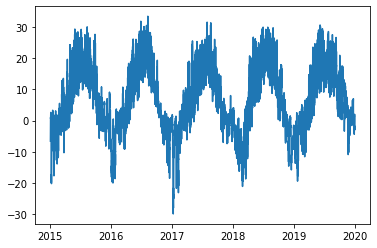

In [ ]:
x = pandas.to_datetime(weather['Местное время в Москве (ВДНХ)'], dayfirst=True)
y = weather['T']

plt.plot(x,y)

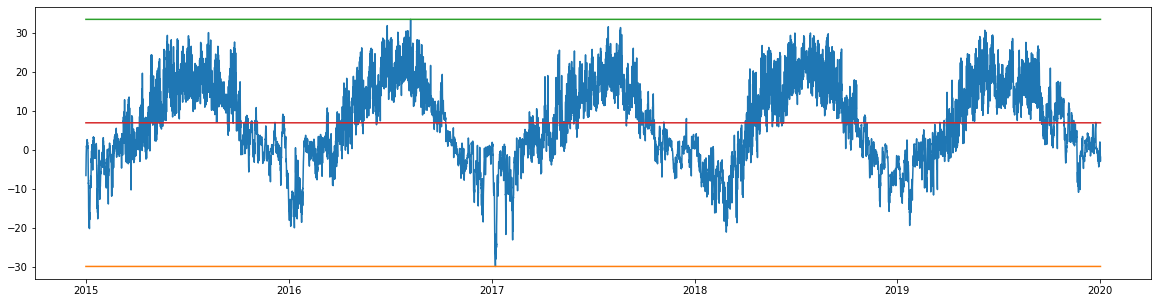

In [ ]:
x = pandas.to_datetime(weather['Местное время в Москве (ВДНХ)'], dayfirst=True)
y = weather['T']

weather['TMin'] = y.min()
weather['TMax'] = y.max()
weather['TMean'] = y.mean()

plt.figure(figsize=(20,5))
plt.plot(x,y,label='Temperature')
plt.plot(x, weather['TMin'], label = 'Min T')
plt.plot(x, weather['TMax'], label = 'Max T')
plt.plot(x, weather['TMean'], label = 'Mean T')

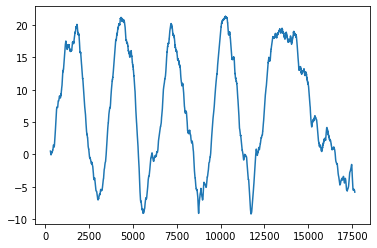

In [ ]:
weather['T'].rolling(300).mean().plot()

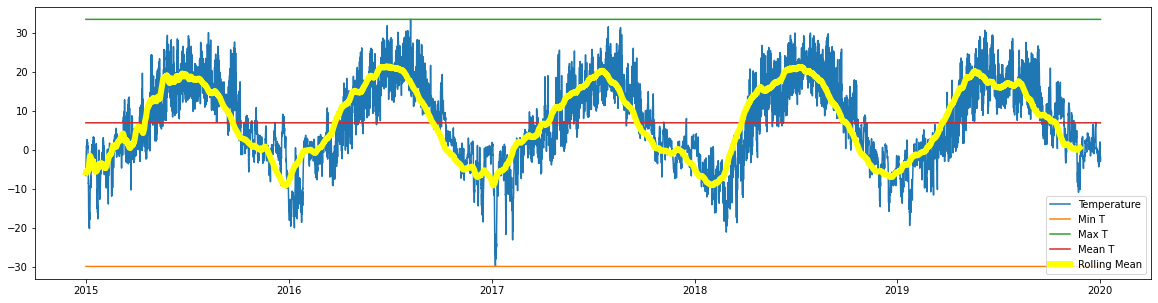

In [ ]:
# Min Max Mean T сглаженный график из скользящего окна, среднее за последние Х(300) измерений
x = pandas.to_datetime(weather['Местное время в Москве (ВДНХ)'], dayfirst=True)
y = weather['T']

weather['TMin'] = y.min()
weather['TMax'] = y.max()
weather['TMean'] = y.mean()
weather['RollMean300'] = weather['T'].rolling(300).mean()

plt.figure(figsize=(20,5))
plt.plot(x,y,label='Temperature')
plt.plot(x, weather['TMin'], label = 'Min T')
plt.plot(x, weather['TMax'], label = 'Max T')
plt.plot(x, weather['TMean'], label = 'Mean T')
plt.plot(x, weather['RollMean300'], label = 'Rolling Mean', color='yellow', linewidth=6)
plt.legend()

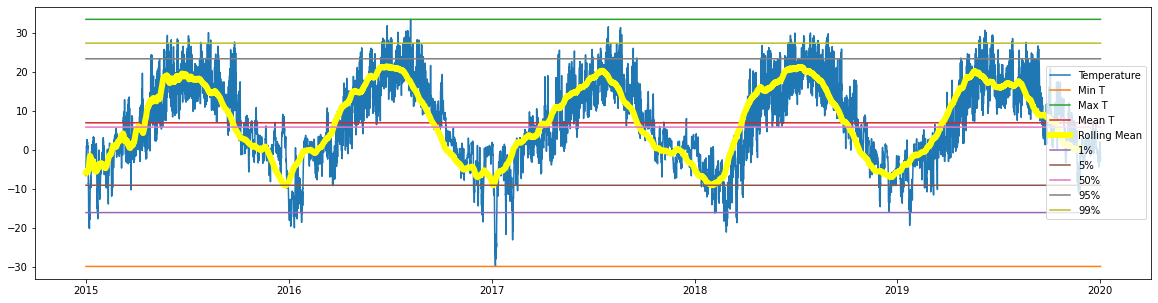

In [ ]:
# Min Max Mean T сглаженный график из скользящего окна, среднее за последние Х(300) измерений
# Добавим квантили 5%, 50%, 95% + 1%, 99%
x = pandas.to_datetime(weather['Местное время в Москве (ВДНХ)'], dayfirst=True)
y = weather['T']

weather['TMin'] = y.min()
weather['TMax'] = y.max()
weather['TMean'] = y.mean()
weather['RollMean300'] = weather['T'].rolling(300).mean()
weather['Q1'] = weather['T'].quantile(0.01)
weather['Q5'] = weather['T'].quantile(0.05)
weather['Q50'] = weather['T'].quantile(0.5)
weather['Q95'] = weather['T'].quantile(0.95)
weather['Q99'] = weather['T'].quantile(0.99)

plt.figure(figsize=(20,5))
plt.plot(x,y,label='Temperature')
plt.plot(x, weather['TMin'], label = 'Min T')
plt.plot(x, weather['TMax'], label = 'Max T')
plt.plot(x, weather['TMean'], label = 'Mean T')
plt.plot(x, weather['RollMean300'], label = 'Rolling Mean', color='yellow', linewidth=6)
plt.plot(x, weather['Q1'], label = '1%')
plt.plot(x, weather['Q5'], label = '5%')
plt.plot(x, weather['Q50'], label = '50%')
plt.plot(x, weather['Q95'], label = '95%')
plt.plot(x, weather['Q99'], label = '99%')
plt.legend()

In [ ]:
weather[ weather['T'] < weather['Q1'] ].groupby('weekday')['T'].count()

weekday
0    27
1    40
2    38
3    21
4    14
5    17
6    16
Name: T, dtype: int64

In [ ]:
weather[ weather['T'] > weather['Q99'] ].groupby('weekday')['T'].count()

weekday
0    18
1    20
2    21
3    11
4    27
5    45
6    32
Name: T, dtype: int64

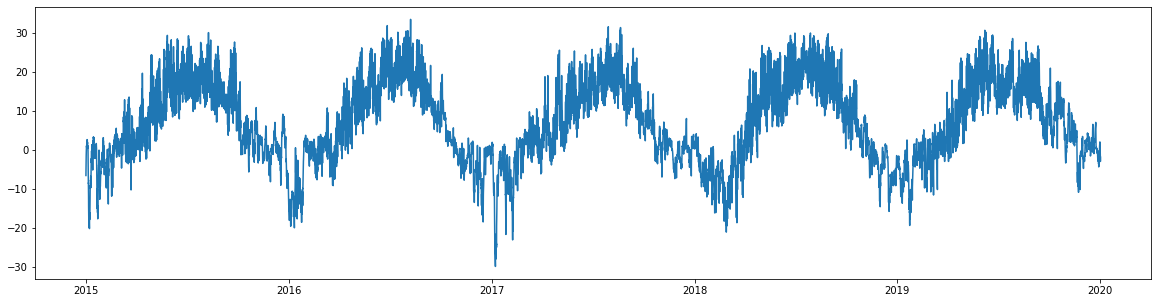

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(x,y,label='Temperature')

In [ ]:
weather = weather.sort_values(by='date').reset_index()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
TrainX = pandas.DataFrame(weather.index)
TrainY = weather['T']
model.fit(TrainX, TrainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

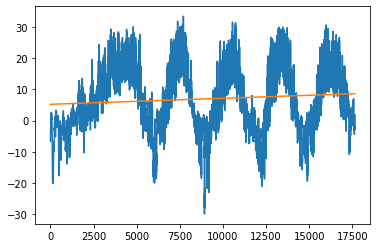

In [ ]:
x = weather.index
y = weather['T']
prediction = model.predict(TrainX)

plt.plot(x,y)
plt.plot(x, prediction)

In [ ]:
weather.groupby('weekday')['T'].count()

weekday
0    2519
1    2519
2    2511
3    2526
4    2534
5    2519
6    2519
Name: T, dtype: int64

In [ ]:
ml_dataset = weather[['T', 'P']].copy()

In [ ]:

# Собрать входные данные (X)
# Собрать выходные данные (y)
# Модель должна найти закономерности между этими данными и использовать их для прогноза f(X) = y

In [ ]:
for i in range(1,21):
  ml_dataset[f'lag{i}'] = ml_dataset['T'].shift(i)
  ml_dataset[f'P_lag{i}'] = ml_dataset['P'].shift(i)

ml_dataset['TMean10'] = ml_dataset['T'].shift(1).rolling(10).mean()
ml_dataset['TMax10'] = ml_dataset['T'].shift(1).rolling(10).max()
ml_dataset['TMin10'] = ml_dataset['T'].shift(1).rolling(10).min()

ml_dataset['PMean10'] = ml_dataset['P'].shift(1).rolling(10).mean()
ml_dataset['PMax10'] = ml_dataset['P'].shift(1).rolling(10).max()
ml_dataset['PMin10'] = ml_dataset['P'].shift(1).rolling(10).min()

ml_dataset['TMean20'] = ml_dataset['T'].shift(1).rolling(20).mean()
ml_dataset['TMax20'] = ml_dataset['T'].shift(1).rolling(20).max()
ml_dataset['TMin20'] = ml_dataset['T'].shift(1).rolling(20).min()

ml_dataset['PMean20'] = ml_dataset['P'].shift(1).rolling(20).mean()
ml_dataset['PMax20'] = ml_dataset['P'].shift(1).rolling(20).max()
ml_dataset['PMin20'] = ml_dataset['P'].shift(1).rolling(20).min()

In [ ]:
ml_dataset

,T,P,lag1,P_lag1,lag2,P_lag2,lag3,P_lag3,lag4,P_lag4,lag5,P_lag5,lag6,P_lag6,lag7,P_lag7,lag8,P_lag8,lag9,P_lag9,lag10,P_lag10,lag11,P_lag11,lag12,P_lag12,lag13,P_lag13,lag14,P_lag14,lag15,P_lag15,lag16,P_lag16,lag17,P_lag17,lag18,P_lag18,lag19,P_lag19,lag20,P_lag20,TMean10,TMax10,TMin10,PMean10,PMax10,PMin10,TMean20,TMax20,TMin20,PMean20,PMax20,PMin20
0,-6.6,758.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.2,758.0,-6.6,758.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5.9,758.0,-6.2,758.0,-6.6,758.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.5,757.8,-5.9,758.0,-6.2,758.0,-6.6,758.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-5.1,757.8,-5.5,757.8,-5.9,758.0,-6.2,758.0,-6.6,758.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,0.0,753.7,1.0,750.1,1.6,747.7,1.7,746.5,2.0,745.6,1.8,745.2,1.4,745.3,1.4,745.7,1.1,746.4,0.5,746.9,-0.2,747.8,-0.4,749.7,-0.6,751.9,-1.7,755.1,-3.0,759.6,-3.4,763.7,-3.7,767.0,-3.6,769.3,-3.7,771.5,-3.5,772.6,-4.0,773.8,1.23,2.0,-0.2,746.72,750.1,745.2,-0.765,2.0,-4.0,755.070,773.8,745.2
17643,-2.0,757.3,0.0,753.7,1.0,750.1,1.6,747.7,1.7,746.5,2.0,745.6,1.8,745.2,1.4,745.3,1.4,745.7,1.1,746.4,0.5,746.9,-0.2,747.8,-0.4,749.7,-0.6,751.9,-1.7,755.1,-3.0,759.6,-3.4,763.7,-3.7,767.0,-3.6,769.3,-3.7,771.5,-3.5,772.6,1.25,2.0,0.0,747.31,753.7,745.2,-0.565,2.0,-3.7,754.065,772.6,745.2
17644,-2.3,758.8,-2.0,757.3,0.0,753.7,1.0,750.1,1.6,747.7,1.7,746.5,2.0,745.6,1.8,745.2,1.4,745.3,1.4,745.7,1.1,746.4,0.5,746.9,-0.2,747.8,-0.4,749.7,-0.6,751.9,-1.7,755.1,-3.0,759.6,-3.4,763.7,-3.7,767.0,-3.6,769.3,-3.7,771.5,1.00,2.0,-2.0,748.35,757.3,745.2,-0.490,2.0,-3.7,753.300,771.5,745.2
17645,-3.0,760.2,-2.3,758.8,-2.0,757.3,0.0,753.7,1.0,750.1,1.6,747.7,1.7,746.5,2.0,745.6,1.8,745.2,1.4,745.3,1.4,745.7,1.1,746.4,0.5,746.9,-0.2,747.8,-0.4,749.7,-0.6,751.9,-1.7,755.1,-3.0,759.6,-3.4,763.7,-3.7,767.0,-3.6,769.3,0.66,2.0,-2.3,749.59,758.8,745.2,-0.420,2.0,-3.7,752.665,769.3,745.2


In [ ]:
ml_dataset.fillna(inplace=True, method='ffill')
y = ml_dataset['T'][20:]
X = ml_dataset.drop(['T', 'P'], axis = 1)[20:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(X_train, y_train)

0.9826231232430634

In [ ]:
lin_reg.score(X_test, y_test)

0.9811767738007692

In [ ]:
from sklearn.metrics import mean_absolute_error
prediction = lin_reg.predict(X_test)
mean_absolute_error(y_test, prediction)

0.9660848081425775

In [ ]:
pandas.DataFrame(data=[lin_reg.coef_], columns = X_train.columns).T.sort_values(by=0)

,0
TMean10,-7.868721e+11
TMean20,-5.931165e+10
P_lag10,-1.602173e-01
P_lag18,-1.577485e-01
P_lag1,-9.675598e-02
P_lag15,-7.893753e-02
P_lag13,-6.973267e-02
P_lag9,-5.938721e-02
P_lag5,-4.748535e-02
P_lag14,-4.243088e-02
